# Breast Cancer Wisconsin (Diagnostic) Data Set

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

#autres

### Importer les data

In [2]:
df=pd.read_csv("cancer_data.csv")

### Afficher les information du dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

### Analyser la target

In [4]:
df.diagnosis.unique()
df.diagnosis.value_counts()[1]

212

### Afficher les statistiques du dataset

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


### Drop les colonnes non utiles 

In [6]:
df=df.drop(columns="Unnamed: 32")

In [7]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Transformer votre target en 0/1 

In [8]:
df.diagnosis=df.diagnosis.replace("M",1)
df.diagnosis=df.diagnosis.replace("B",0)
df.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

### Normaliser vos features 

In [9]:
y=df.diagnosis
X=df.drop(columns="diagnosis")


X.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
from sklearn.preprocessing import StandardScaler

nm=StandardScaler()
X=nm.fit_transform(X)
df=pd.DataFrame(X,columns=df.drop(columns="diagnosis").columns)
df.describe()

C:\Users\Aziz\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aziz\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,8.877882e-18,-1.256562e-16,1.049736e-16,-1.272171e-16,-1.900452e-16,1.490704e-16,2.544342e-16,-1.338511e-16,-8.429110e-17,2.081912e-16,...,-7.988142e-16,-1.834112e-17,-4.015534e-16,-2.848727e-17,-2.189227e-16,-2.579464e-16,1.143393e-16,2.829215e-16,1.670212e-16,2.321908e-16
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.430790e-01,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-2.361897e-01,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.358950e-01,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,-1.725930e-01,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,7.052629e+00,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


### Ploter la répartition de la target

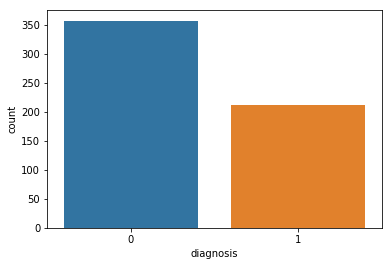

In [11]:
sb.countplot(y)

### Faire une fonction qui permet d'afficher le % des gens qui on un cancer grave 

In [12]:
def f(x):
    return print("{}%".format(sum(x)/len(x)*100))

def g(x):
    return print("{}%".format(x.value_counts()[1]/len(x)*100))

f(y)
g(y)

37.258347978910365%
37.258347978910365%


### Affichier les colonnes du dataset

In [13]:
mean_cols = [col for col in df.columns if 'mean' in col]
df_mean = df[mean_cols]

### Regrouper dans un dataFrame la target avec les 'data moyenne' 

In [14]:
df_mean["diagnosis"]=y

C:\Users\Aziz\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
df_mean.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,1
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,1
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,1
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1


### Afficher la heatmap de ce dataFrame

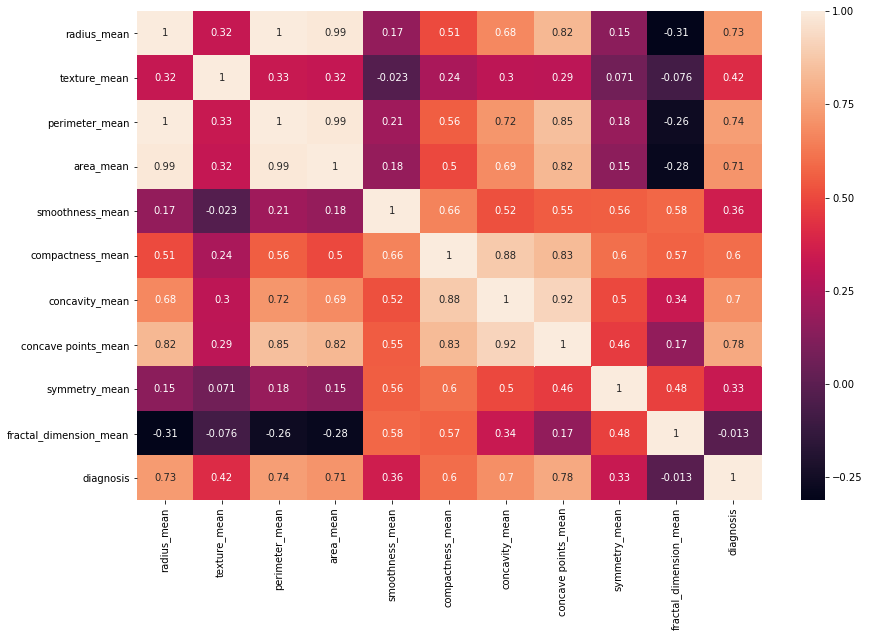

In [16]:
corr=df_mean.corr()

plt.figure(figsize=(14,9))
sb.heatmap(corr,annot=True)

### Feature importance
Cibler les features qui ont une corrélation importante avec la variable cible **diagnosis**.

In [17]:
df["diagnosis"]=y
df2=df[corr[abs(corr["diagnosis"])>0.50].index]
df2

,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,diagnosis
0,1.097064,1.269934,0.984375,3.283515,2.652874,2.532475,1
1,1.829821,1.685955,1.908708,-0.487072,-0.023846,0.548144,1
2,1.579888,1.566503,1.558884,1.052926,1.363478,2.037231,1
3,-0.768909,-0.592687,-0.764464,3.402909,1.915897,1.451707,1
4,1.750297,1.776573,1.826229,0.539340,1.371011,1.428493,1
5,-0.476375,-0.387148,-0.505650,1.244335,0.866302,0.824656,1
6,1.170908,1.138125,1.095295,0.088295,0.300072,0.646935,1
7,-0.118517,-0.072867,-0.218965,1.140102,0.061026,0.281950,1
8,-0.320167,-0.184080,-0.384207,1.684010,1.219096,1.150692,1
9,-0.473535,-0.329482,-0.509063,2.563358,1.738872,0.941760,1


### Afficher le graphique des malades en fonction de 'perimeter_mean'

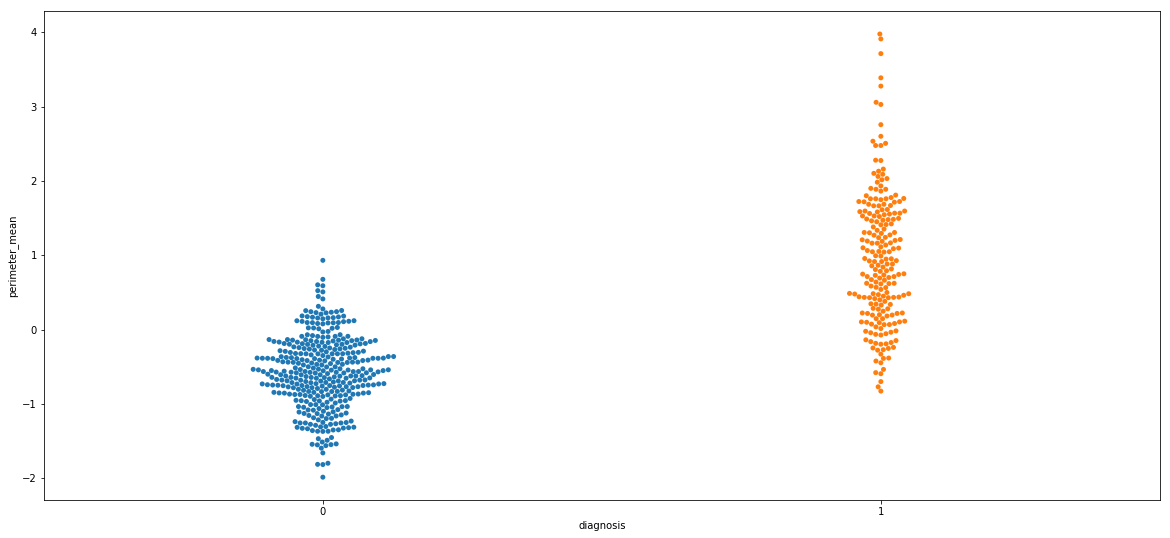

In [18]:
plt.figure(figsize=(20,9))
sb.swarmplot(x="diagnosis",y="perimeter_mean",data=df2)

### Définir les features, la target et spliter les data 

In [19]:
y=df2.diagnosis
X=df2.drop(columns="diagnosis")

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

from sklearn.model_selection import cross_val_score


(398, 6)
(171, 6)
(398,)
(171,)


## Logistic Regression Model:
Un modèle de régression logistique peut être adapté à notre problème puisque ce modèle permet de déterminer les features qui mène à un résultat binaire 0 ou 1.

**Implémenter le modèle et afficher son accuracy.**

In [20]:
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()

LR.fit(X_train,y_train)
LR.score(X_test,y_test)

C:\Users\Aziz\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9122807017543859

## SVM:

**Implémenter le modèle et afficher son accuracy.**

In [21]:
from sklearn.svm import SVC

svc=SVC()

svc.fit(X_train,y_train)
svc.score(X_test,y_test)

C:\Users\Aziz\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9298245614035088

## Random Forest Model:
**Implémenter le modèle et afficher son accuracy.**

In [22]:
from sklearn.ensemble import RandomForestClassifier

RFC=RandomForestClassifier()

RFC.fit(X_train,y_train)
RFC.score(X_test,y_test)

C:\Users\Aziz\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9239766081871345

## Naive Bayes:
**Implémenter le modèle et afficher son accuracy.**

In [23]:
from sklearn.naive_bayes import GaussianNB

GNB=GaussianNB()

GNB.fit(X_train,y_train)
GNB.score(X_test,y_test)

0.9239766081871345

### Faire une boucle en faisant varier le nombre d'estimateur du 'RandomForestClassifier' afin de déterminer le meilleur paramètre 

In [24]:
a=[]

for f in np.arange(1,100):
    RFC=RandomForestClassifier(n_estimators=f)
    RFC.fit(X_train,y_train)
    print("N= "+str(f) + " : Score ={}".format(RFC.score(X_test,y_test)))
    a.append(RFC.score(X_test,y_test))

N= 1 : Score =0.8947368421052632
N= 2 : Score =0.8830409356725146
N= 3 : Score =0.9181286549707602
N= 4 : Score =0.935672514619883
N= 5 : Score =0.9122807017543859
N= 6 : Score =0.9239766081871345
N= 7 : Score =0.9298245614035088
N= 8 : Score =0.9122807017543859
N= 9 : Score =0.9181286549707602
N= 10 : Score =0.935672514619883
N= 11 : Score =0.9122807017543859
N= 12 : Score =0.9122807017543859
N= 13 : Score =0.9005847953216374
N= 14 : Score =0.9239766081871345
N= 15 : Score =0.9473684210526315
N= 16 : Score =0.9298245614035088
N= 17 : Score =0.9122807017543859
N= 18 : Score =0.9298245614035088
N= 19 : Score =0.9181286549707602
N= 20 : Score =0.9122807017543859
N= 21 : Score =0.9122807017543859
N= 22 : Score =0.9122807017543859
N= 23 : Score =0.9298245614035088
N= 24 : Score =0.9181286549707602
N= 25 : Score =0.9181286549707602
N= 26 : Score =0.9122807017543859
N= 27 : Score =0.9181286549707602
N= 28 : Score =0.9181286549707602
N= 29 : Score =0.9122807017543859
N= 30 : Score =0.91812865

### Implémenter le modèle 'RandomForestClassifier' avec ce paramètre

In [25]:
np.argmax(a)

14

In [26]:
np.max(a)

0.9473684210526315